<a href="https://colab.research.google.com/github/NoobBeginnerReal/Telco-Customer-Churn-Prediction/blob/main/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!kaggle datasets download -d blastchar/telco-customer-churn

# Unzip dataset
with zipfile.ZipFile("telco-customer-churn.zip", "r") as zip_ref:
    zip_ref.extractall("data")


Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 70.5MB/s]


# **LOAD THE DATASET FROM ZIP FILE**

In [ ]:
import pandas as pd

df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print(df.isnull().sum())

# Check duplicates
print("Total Duplicate:", df.duplicated().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Total Duplicate: 0


In [ ]:
print(df.info)

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

Check Unique Values of some variables: MultipleLines, InternetService, Contract and PaymentMethod

In [ ]:
# Chekc unique values
print("MultipleLines:", df['MultipleLines'].unique())
print("InternetService:", df['InternetService'].unique())
print("Contract:", df['Contract'].unique())
print("PaymentMethod:", df['PaymentMethod'].unique())
print("OnlineBackup:", df['OnlineBackup'].unique())

MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
OnlineBackup: ['Yes' 'No' 'No internet service']


Encode Binary variables to prep for prediction

In [ ]:
# Mapping binary variables into 1 and 0 for modeling
binary_cols = [
    "Partner", "Dependents", "PhoneService", "OnlineSecurity", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "Churn"
]

for col in binary_cols:
  df[col] = df[col].map({"Yes":1, "No": 0})

# Also Map gender to simplify modeling
df["gender"] = df["gender"].map({"Male": 1, "Female": 0})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,0.0,...,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,1.0,...,1.0,0.0,0.0,0.0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,1.0,...,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,1.0,...,1.0,1.0,0.0,0.0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,0.0,...,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
df = pd.get_dummies(df, columns=["MultipleLines", "InternetService", "Contract", "PaymentMethod", "OnlineBackup"], drop_first=False)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,DeviceProtection,TechSupport,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes
0,7590-VHVEG,0,0,1,0,1,0,0.0,0.0,0.0,...,True,False,False,False,False,True,False,False,False,True
1,5575-GNVDE,1,0,0,0,34,1,1.0,1.0,0.0,...,False,True,False,False,False,False,True,True,False,False
2,3668-QPYBK,1,0,0,0,2,1,1.0,0.0,0.0,...,True,False,False,False,False,False,True,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,1.0,1.0,1.0,...,False,True,False,True,False,False,False,True,False,False
4,9237-HQITU,0,0,0,0,2,1,0.0,0.0,0.0,...,True,False,False,False,False,True,False,True,False,False


In [ ]:
print(df.isnull().sum()[df.isnull().sum() > 0])
df.fillna(0, inplace=True)
print(df.isnull().sum()[df.isnull().sum() > 0])

OnlineSecurity      1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
dtype: int64
Series([], dtype: int64)


In [ ]:
print(df.isnull().sum().sum())  # Should return 0

0


In [ ]:
print(df.dtypes)  # Check data types
print(df.head())  # See if True/False appears

customerID                                  object
gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
OnlineSecurity                             float64
DeviceProtection                           float64
TechSupport                                float64
StreamingTV                                float64
StreamingMovies                            float64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                                object
Churn                                        int64
MultipleLines_No                              bool
MultipleLines_No phone service                bool
MultipleLines_Yes                             bool
InternetService_DSL            

In [ ]:
print(df["MultipleLines_Yes"].sum())  # Should give the count of "Yes"


2971


In [ ]:
df = df.replace({True: 1, False: 0})


<ipython-input-14-0ea0dd73b5d1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
print(df.dtypes)  # TotalCharges should now be float
print("Null?:", df["TotalCharges"].isnull().sum())  # Check if any NaNs were created
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)
print("Null again?:", df["TotalCharges"].isnull().sum())

customerID                                  object
gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
OnlineSecurity                             float64
DeviceProtection                           float64
TechSupport                                float64
StreamingTV                                float64
StreamingMovies                            float64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
MultipleLines_No                             int64
MultipleLines_No phone service               int64
MultipleLines_Yes                            int64
InternetService_DSL            

<ipython-input-15-05de49696b0e>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


In [ ]:
print(df.dtypes)  # Check data types again
print(df.head())  # See if True/False appears

customerID                                  object
gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
OnlineSecurity                             float64
DeviceProtection                           float64
TechSupport                                float64
StreamingTV                                float64
StreamingMovies                            float64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
MultipleLines_No                             int64
MultipleLines_No phone service               int64
MultipleLines_Yes                            int64
InternetService_DSL            

            gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7043.000000    7043.000000  7043.000000  7043.000000  7043.000000   
mean      0.504756       0.162147     0.483033     0.299588    32.371149   
std       0.500013       0.368612     0.499748     0.458110    24.559481   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       1.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  OnlineSecurity  DeviceProtection  TechSupport  \
count   7043.000000     7043.000000       7043.000000  7043.000000   
mean       0.903166        0.286668          0.343888     0.290217   
std        0.295752        0.452237          0.475038     0.453895   
min        0.000000        0.000000

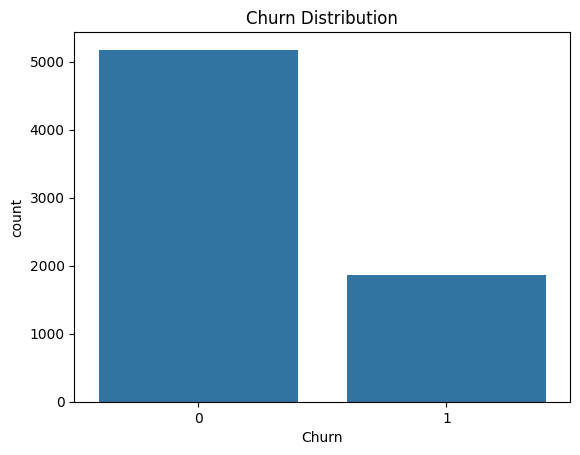

In [ ]:
print(df.describe())
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()

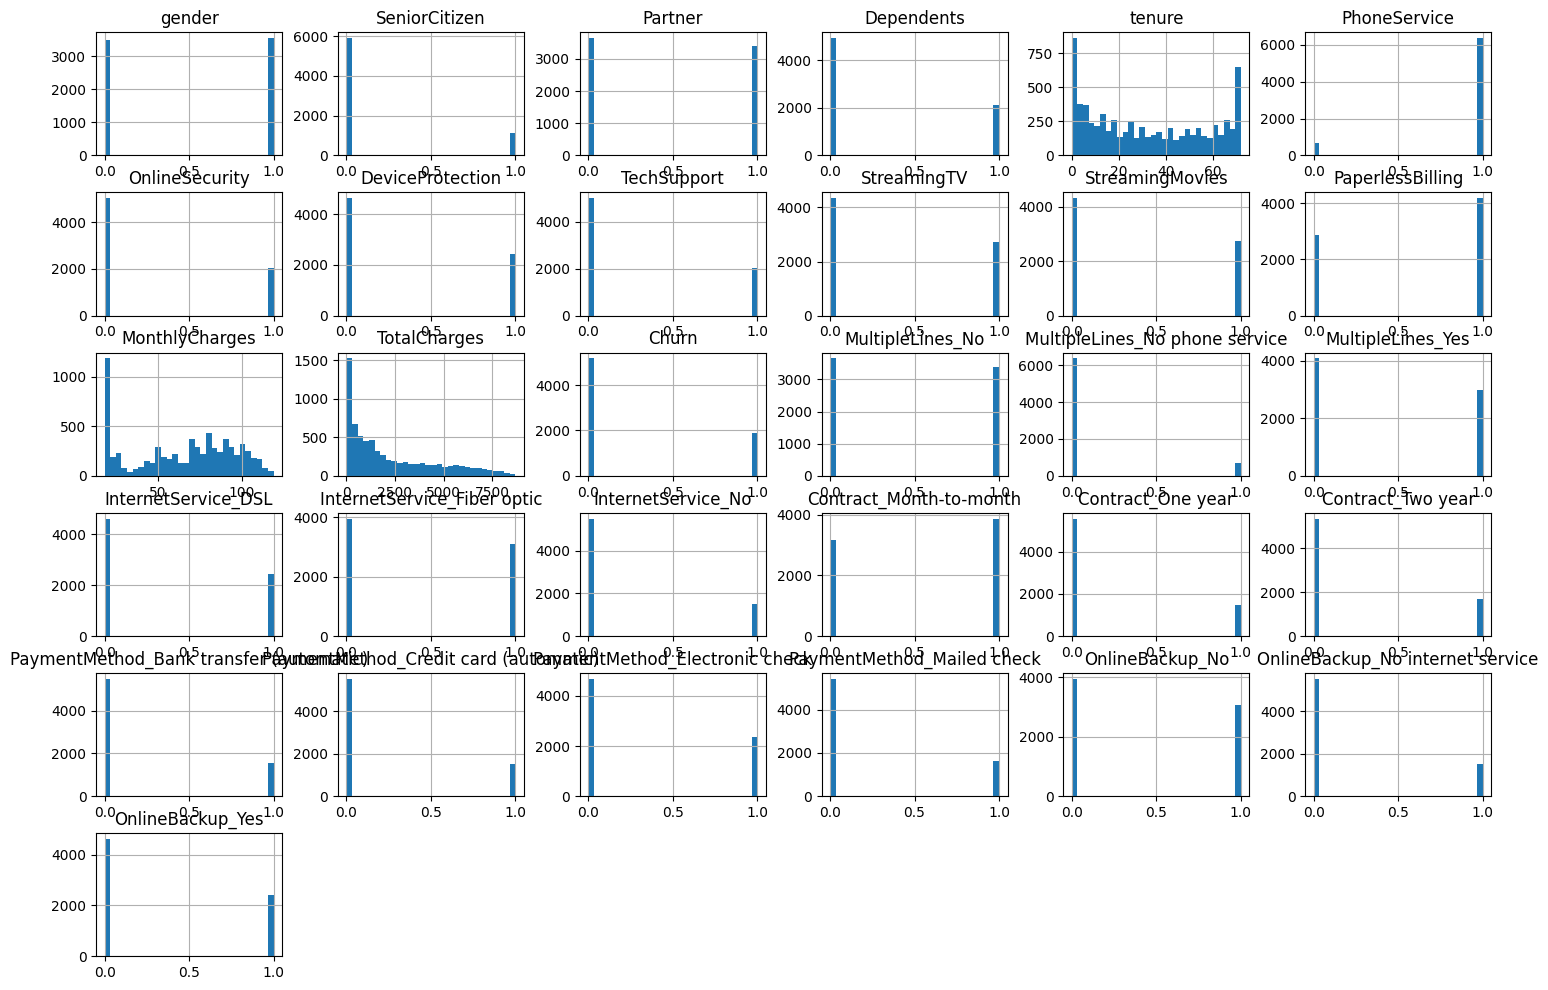

In [ ]:
df.hist(figsize=(18, 12), bins=30)
plt.show()

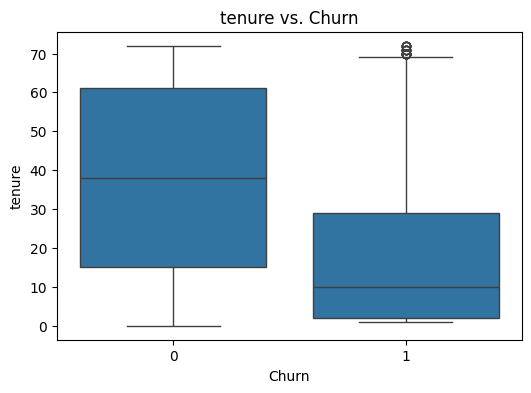

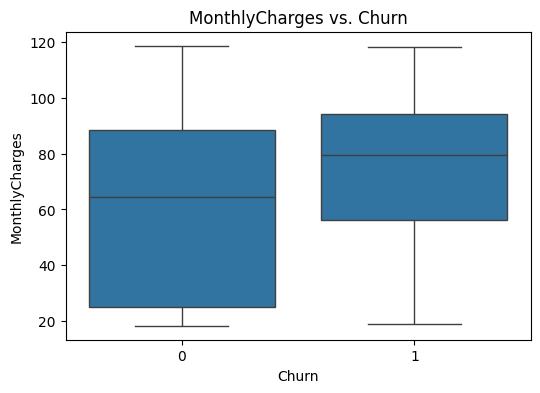

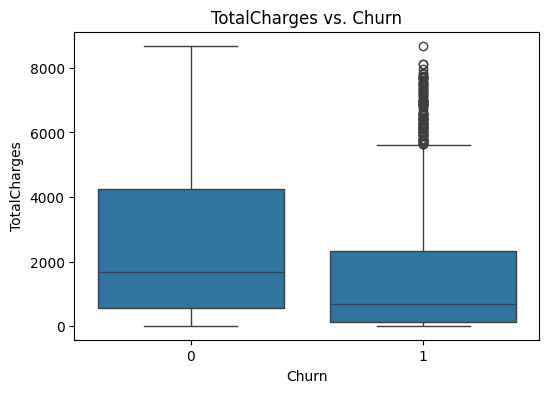

In [ ]:
for col in ["tenure", "MonthlyCharges", "TotalCharges"]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="Churn", y=col, data=df)
    plt.title(f"{col} vs. Churn")
    plt.show()

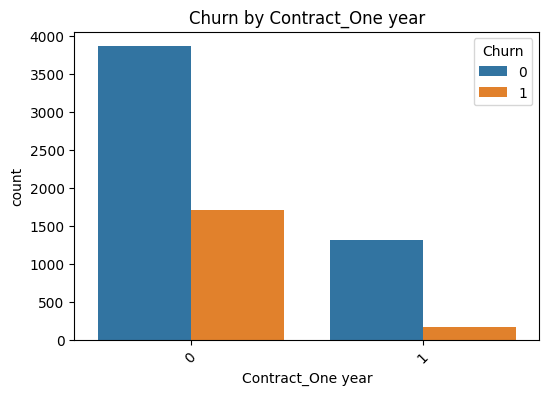

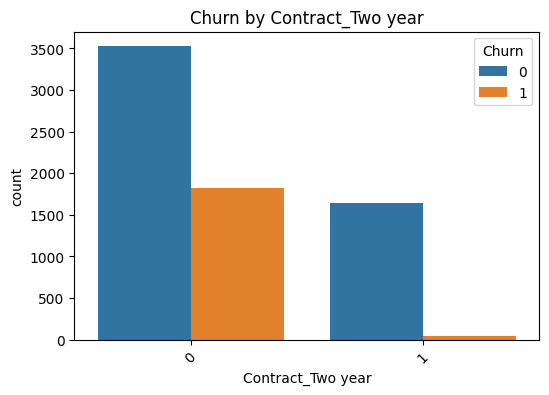

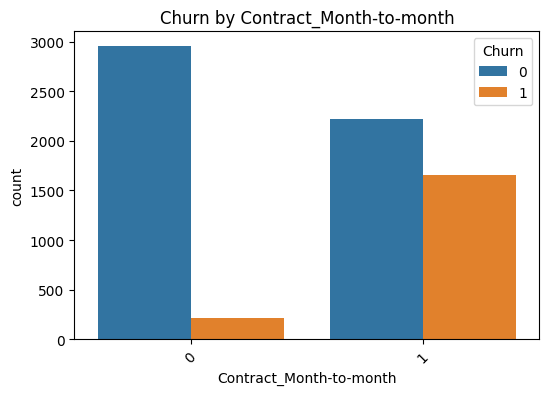

In [ ]:
for col in ["Contract_One year", "Contract_Two year", "Contract_Month-to-month"]:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue="Churn", data=df)
    plt.title(f"Churn by {col}")
    plt.xticks(rotation=45)
    plt.show()


Month-to-month contract have a significant churn rate compared to 2 other types of contracts

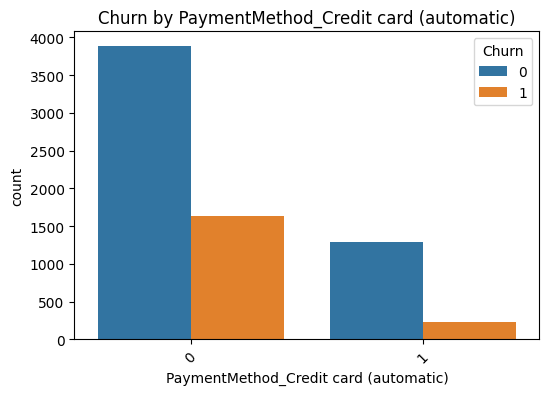

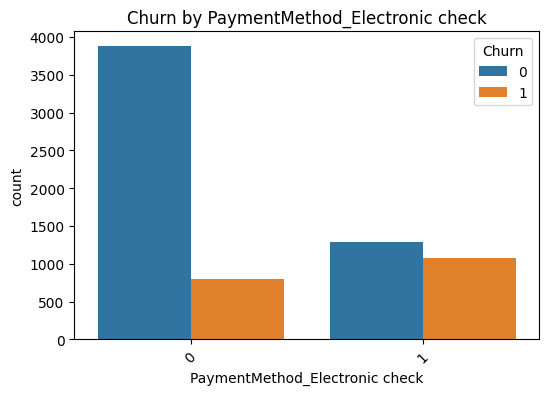

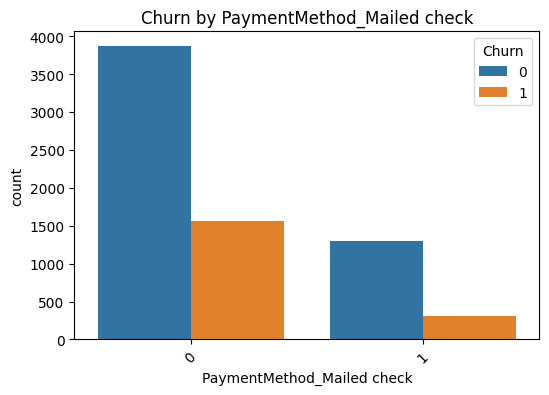

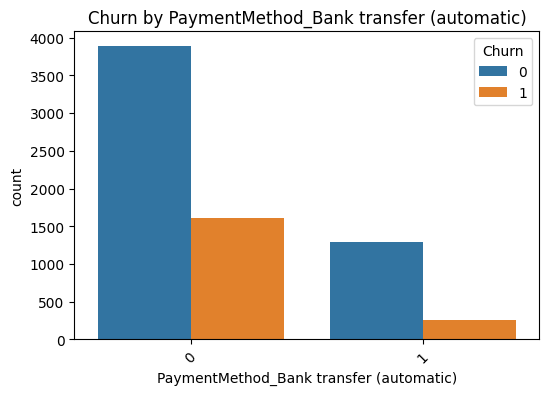

In [ ]:
for col in ["PaymentMethod_Credit card (automatic)", "PaymentMethod_Electronic check", "PaymentMethod_Mailed check", "PaymentMethod_Bank transfer (automatic)"]:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue="Churn", data=df)
    plt.title(f"Churn by {col}")
    plt.xticks(rotation=45)
    plt.show()

Significant churn observed in Payment Method electronic check

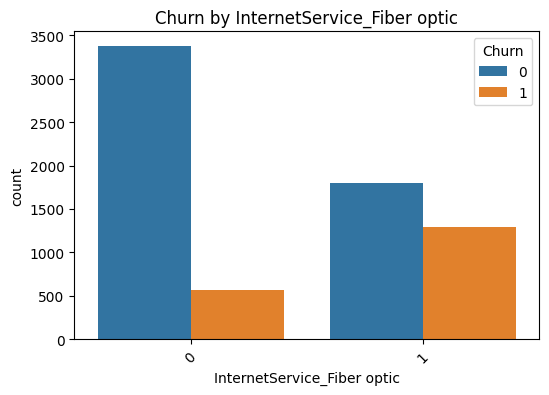

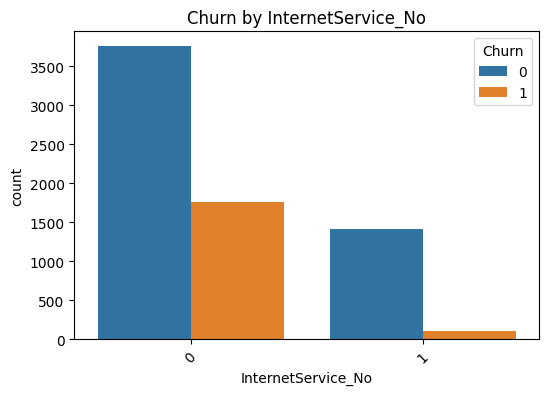

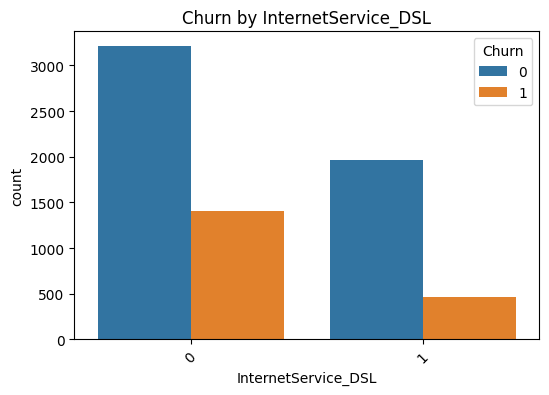

In [ ]:
for col in ["InternetService_Fiber optic", "InternetService_No", "InternetService_DSL"]:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue="Churn", data=df)
    plt.title(f"Churn by {col}")
    plt.xticks(rotation=45)
    plt.show()

Significant Churn can be observed in Fiber optic internet service

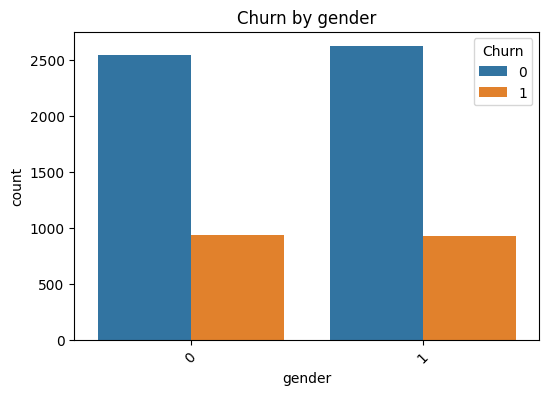

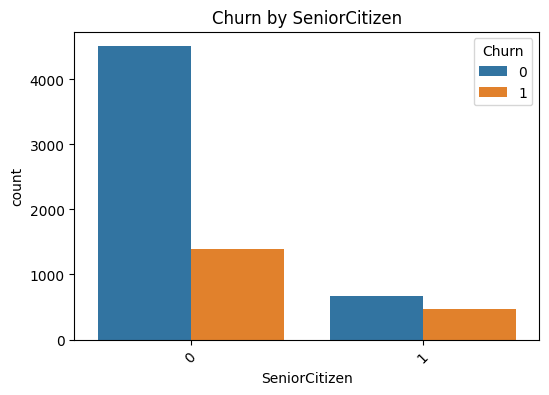

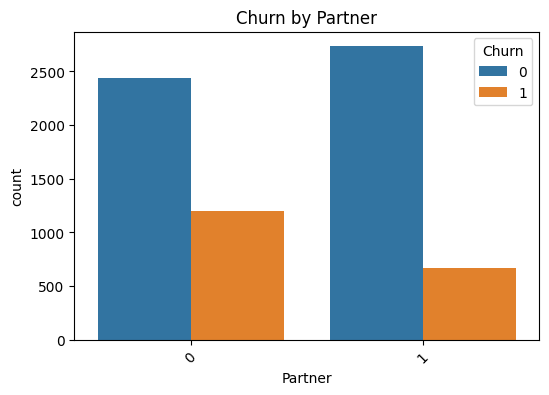

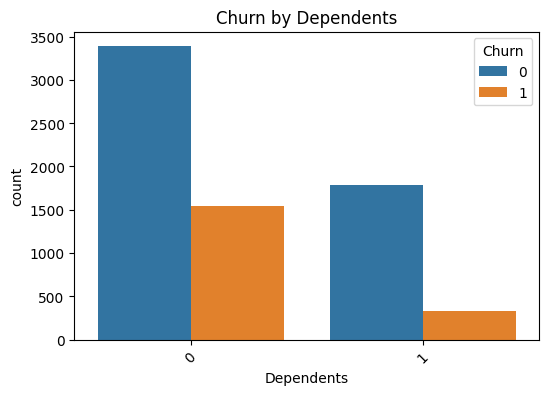

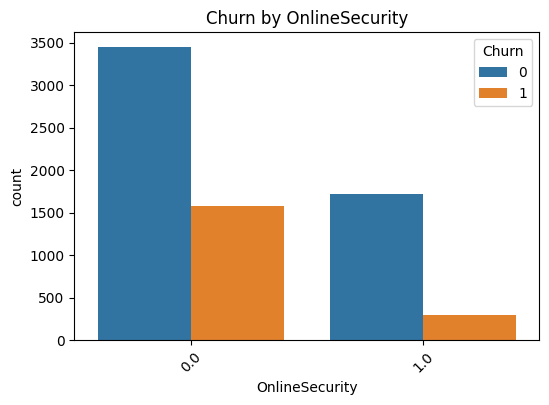

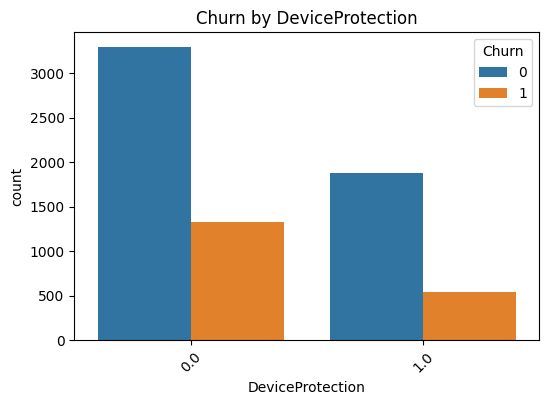

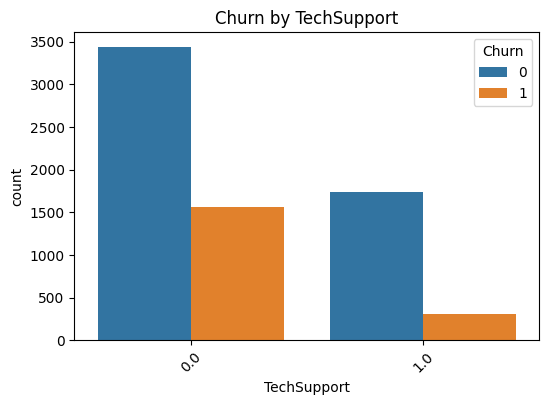

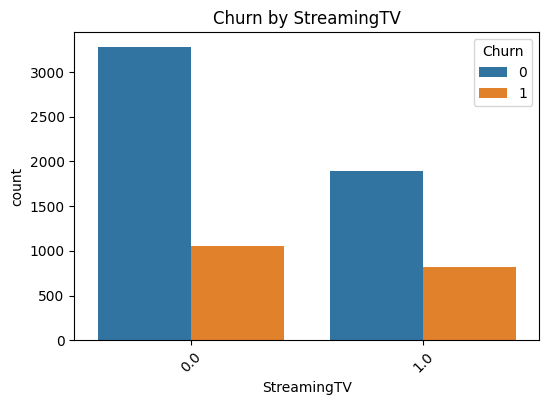

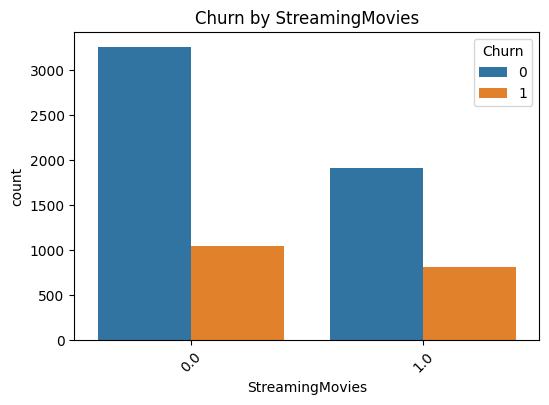

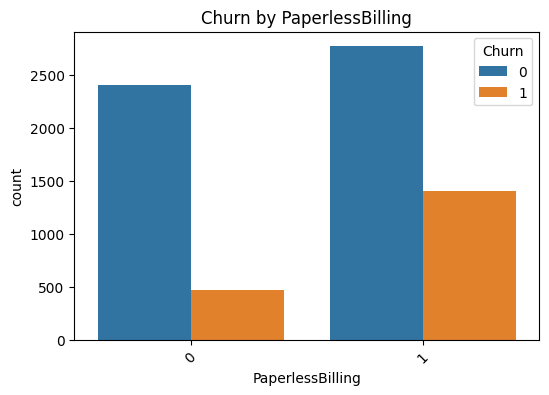

In [ ]:
for col in ["gender", "SeniorCitizen", "Partner", "Dependents", "OnlineSecurity", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling"]:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue="Churn", data=df)
    plt.title(f"Churn by {col}")
    plt.xticks(rotation=45)
    plt.show()

Run the data through the models

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,DeviceProtection,TechSupport,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes
0,7590-VHVEG,0,0,1,0,1,0,0.0,0.0,0.0,...,1,0,0,0,0,1,0,0,0,1
1,5575-GNVDE,1,0,0,0,34,1,1.0,1.0,0.0,...,0,1,0,0,0,0,1,1,0,0
2,3668-QPYBK,1,0,0,0,2,1,1.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,1.0,1.0,1.0,...,0,1,0,1,0,0,0,1,0,0
4,9237-HQITU,0,0,0,0,2,1,0.0,0.0,0.0,...,1,0,0,0,0,1,0,1,0,0


Accuracy: 0.73
Precision: 0.50
Recall: 0.50
F1 Score: 0.50
AUC: 0.6581188744218268
Cross Entropy (Log Loss): 9.691266992561506
Specificity: 0.82
True Positives (TP): 286
False Positives (FP): 282
True Negatives (TN): 1257
False Negatives (FN): 288


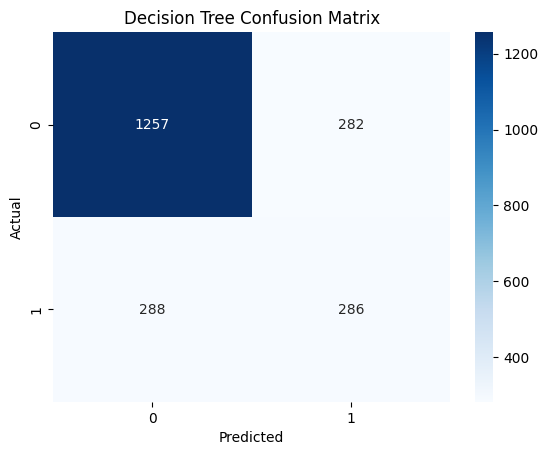

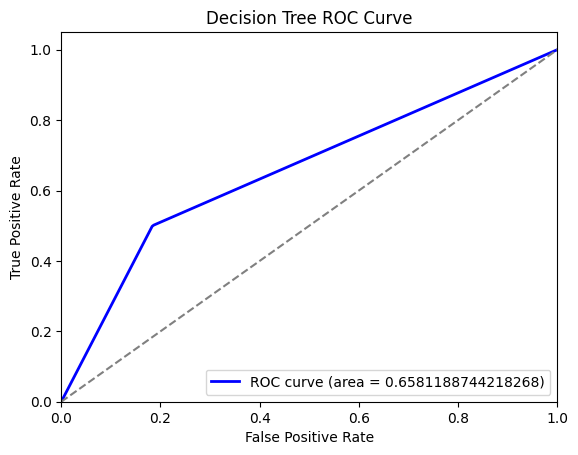

In [ ]:
# Import necessary libraries for Decision Tree
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, log_loss

X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# Scale the features but keep DataFrame format
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame to retain column names
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
y_pred_proba = dt_model.predict_proba(X_test)[:, 1] if hasattr(dt_model, "predict_proba") else None

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"
cross_entropy = log_loss(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {auc}")
print(f"Cross Entropy (Log Loss): {cross_entropy}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.2f}")

# Print confusion matrix values
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")

# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Plot ROC Curve if probabilities are available
if y_pred_proba is not None:
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Decision Tree ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
print("Training Accuracy:", dt_model.score(X_train, y_train))
print("Test Accuracy:", dt_model.score(X_test, y_test))


Training Accuracy: 0.9983772819472616
Test Accuracy: 0.7302413629910081


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:20:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.78
Precision: 0.63
Recall: 0.51
F1 Score: 0.56
AUC: 0.83
Cross Entropy (Log Loss): 0.45
Specificity: 0.89
True Positives (TP): 294
False Positives (FP): 176
True Negatives (TN): 1363
False Negatives (FN): 280


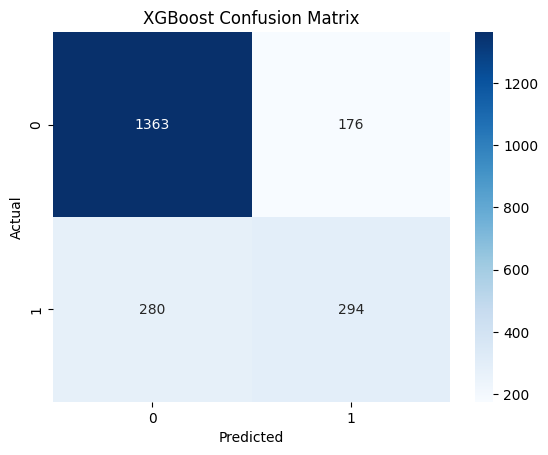

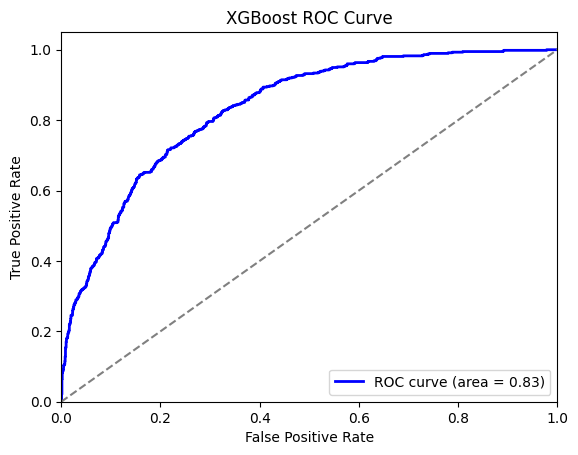

In [ ]:
# Import necessary libraries for XGBoost
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, log_loss
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)


# Scale the features but keep DataFrame format
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame to retain column names
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)


xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
cross_entropy = log_loss(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")
print(f"Cross Entropy (Log Loss): {cross_entropy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.2f}")

# Print confusion matrix values
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")

# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.75
Precision: 0.54
Recall: 0.49
F1 Score: 0.52
AUC: 0.77
Cross Entropy (Log Loss): 1.04
Specificity: 0.84
True Positives (TP): 282
False Positives (FP): 239
True Negatives (TN): 1300
False Negatives (FN): 292


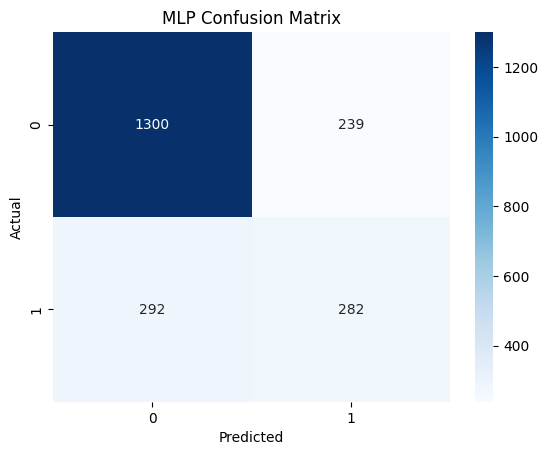

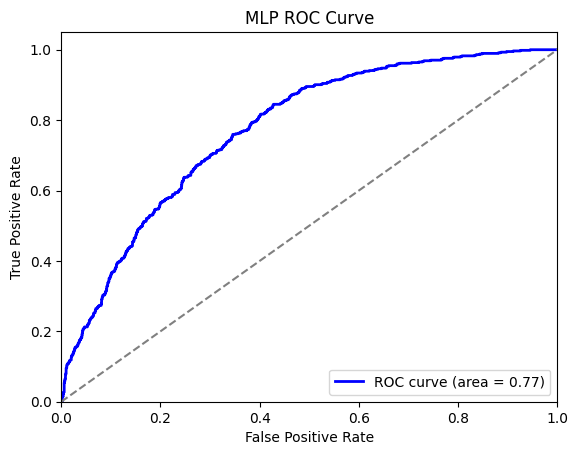

In [ ]:
# Import necessary libraries for MLP
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, log_loss
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# Scale the features but keep DataFrame format
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame to retain column names
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)


from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Adjust as needed
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50, 25), activation='tanh', solver='adam', max_iter=2000, random_state=42) # 3 hidden layers and adam solver seems work best
mlp_model.fit(X_train, y_train)

y_pred = mlp_model.predict(X_test)
y_pred_proba = mlp_model.predict_proba(X_test)[:, 1]

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
cross_entropy = log_loss(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")
print(f"Cross Entropy (Log Loss): {cross_entropy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.2f}")

# Print confusion matrix values
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")

# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('MLP Confusion Matrix')
plt.show()

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP ROC Curve')
plt.legend(loc="lower right")
plt.show()

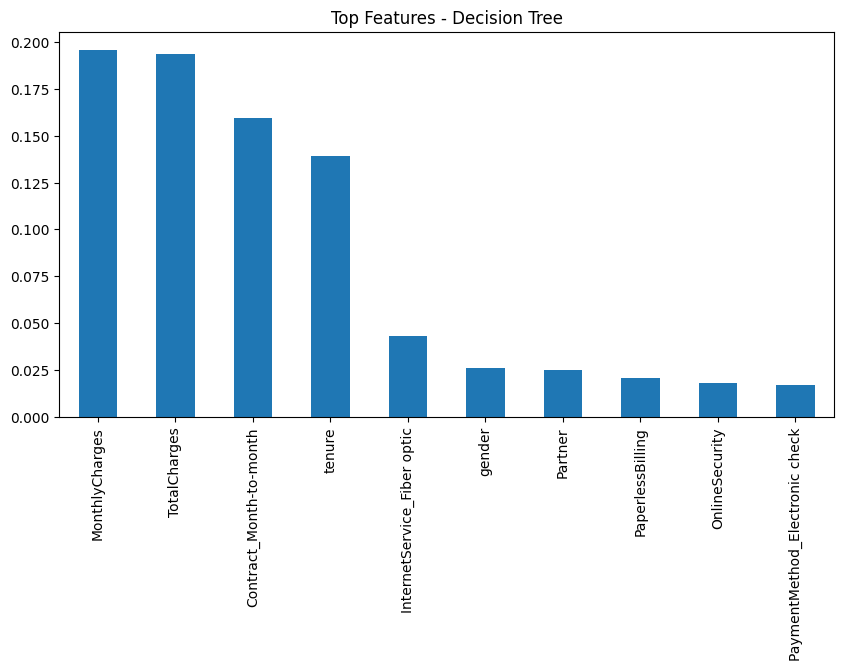

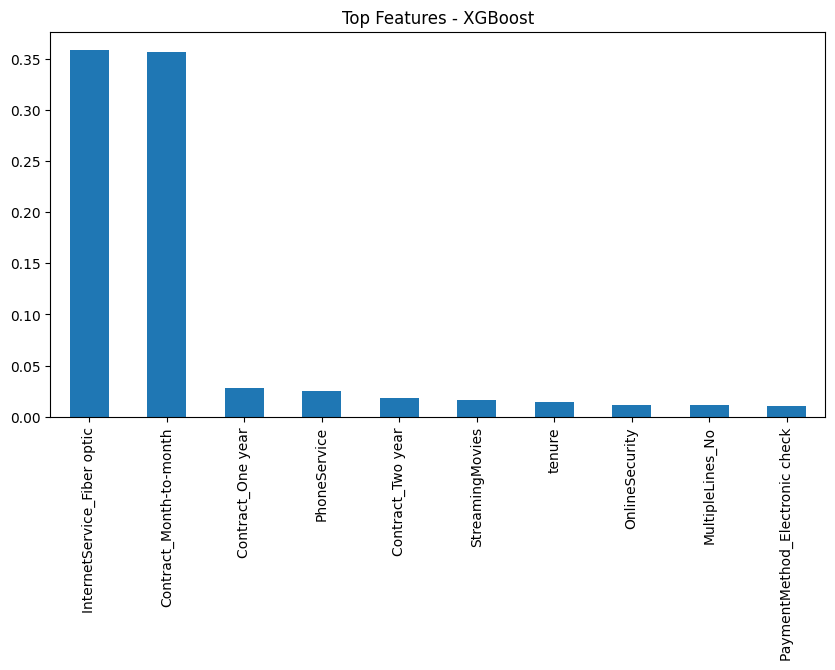

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance for DT
dt_importance = pd.Series(dt_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Get feature importance for XGB
xgb_importance = pd.Series(xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
dt_importance.head(10).plot(kind="bar", title="Top Features - Decision Tree")
plt.show()

plt.figure(figsize=(10, 5))
xgb_importance.head(10).plot(kind="bar", title="Top Features - XGBoost")
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Run LASSO Logistic Regression
lasso = LogisticRegression(penalty="l1", solver="liblinear", C=0.01, random_state=42)
lasso.fit(X_train, y_train)

# Get non-zero coefficients (important features)
selected_features_lasso = X_train.columns[np.abs(lasso.coef_).flatten() > 0]
print("LASSO Selected Features:", selected_features_lasso)


LASSO Selected Features: Index(['SeniorCitizen', 'tenure', 'OnlineSecurity', 'StreamingMovies',
       'PaperlessBilling', 'MultipleLines_No', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'OnlineBackup_No',
       'OnlineBackup_No internet service'],
      dtype='object')


In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler

# Scale data (Elastic Net requires it)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Elastic Net
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=42)  # l1_ratio=0.5 balances LASSO & Ridge
elastic_net.fit(X_train_scaled, y_train)

# Get non-zero coefficients
selected_features_en = X_train.columns[np.abs(elastic_net.coef_) > 0]
print("Elastic Net Selected Features:", selected_features_en)


Elastic Net Selected Features: Index(['gender', 'SeniorCitizen', 'Dependents', 'tenure', 'OnlineSecurity',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'MultipleLines_No',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'PaymentMethod_Electronic check', 'OnlineBackup_No',
       'OnlineBackup_No internet service'],
      dtype='object')


In [ ]:
# Features initially selected by Decision Tree & XGBoost (manually input from importance plots)
dt_xgb_selected = [
    "tenure", "OnlineSecurity", "Contract_Month-to-month",
    "InternetService_Fiber optic", "Contract_Two year",
    "TotalCharges", "MonthlyCharges", "PaperlessBilling",
    "PaymentMethod_Electronic check", "TechSupport"
]

# Features also selected by LASSO & Elastic Net
final_features = list(set(dt_xgb_selected) & set(selected_features_lasso) & set(selected_features_en))

# Keep only selected features
X_train_selected = X_train[final_features]
X_test_selected = X_test[final_features]

print("Final Selected Features:", final_features)


Final Selected Features: ['OnlineSecurity', 'PaperlessBilling', 'Contract_Month-to-month', 'tenure', 'PaymentMethod_Electronic check', 'InternetService_Fiber optic']


In [ ]:
# Keep only the final selected features
X_train_selected = X_train[[
    'tenure', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check',
    'PaperlessBilling', 'OnlineSecurity', 'Contract_Month-to-month'
]]

X_test_selected = X_test[[
    'tenure', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check',
    'PaperlessBilling', 'OnlineSecurity', 'Contract_Month-to-month'
]]

print("New dataset shape:", X_train_selected.shape, X_test_selected.shape)


New dataset shape: (4930, 6) (2113, 6)


In [ ]:
print(X_train_selected.head())  # Check first few rows
print(X_train_selected.isnull().sum())  # Ensure no missing values


     tenure  InternetService_Fiber optic  PaymentMethod_Electronic check  \
0  0.881078                    -0.882690                        1.399708   
1 -1.284263                     1.132901                        1.399708   
2 -0.793997                    -0.882690                       -0.714435   
3 -0.344587                     1.132901                        1.399708   
4 -1.079985                     1.132901                        1.399708   

   PaperlessBilling  OnlineSecurity  Contract_Month-to-month  
0          0.841222       -0.634162                -1.095853  
1          0.841222       -0.634162                 0.912532  
2         -1.188746       -0.634162                -1.095853  
3          0.841222       -0.634162                -1.095853  
4          0.841222        1.576884                 0.912532  
tenure                            0
InternetService_Fiber optic       0
PaymentMethod_Electronic check    0
PaperlessBilling                  0
OnlineSecurity       

In [ ]:
# Due to the time it take to run tuning, I turned it into comments to prevent wasting time for demonstration
#from sklearn.model_selection import GridSearchCV
#from sklearn.tree import DecisionTreeClassifier
#from xgboost import XGBClassifier
#from sklearn.neural_network import MLPClassifier
#import numpy as np

#dt_params = {
    #'max_depth': [3, 5, 10, None],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 5],
    #'criterion': ['gini', 'entropy']
#}

#dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='f1', n_jobs=-1)
#dt_grid.fit(X_train_selected, y_train)

#print("Best Decision Tree Params:", dt_grid.best_params_)

#xgb_params = {
 #   'n_estimators': [100, 300, 500],
  #  'max_depth': [3, 5, 10],
   # 'learning_rate': [0.01, 0.1, 0.3],
    #'subsample': [0.7, 0.9, 1.0],
    #'colsample_bytree': [0.7, 0.9, 1.0]
#}

#xgb_grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
 #                       xgb_params, cv=5, scoring='f1', n_jobs=-1)
#xgb_grid.fit(X_train_selected, y_train)

#print("Best XGBoost Params:", xgb_grid.best_params_)

#mlp_params = {
 #   'hidden_layer_sizes': [(50,), (100,), (100, 50), (100, 50, 25)],
  #  'activation': ['relu', 'tanh'],
   # 'solver': ['adam', 'sgd'],
    #'alpha': [0.0001, 0.001, 0.01]
#}

#mlp_grid = GridSearchCV(MLPClassifier(max_iter=500, random_state=42),
 #                       mlp_params, cv=5, scoring='f1', n_jobs=-1)
#mlp_grid.fit(X_train_selected, y_train)

#print("Best MLP Params:", mlp_grid.best_params_)
#best_dt = dt_grid.best_estimator_
#best_xgb = xgb_grid.best_estimator_
#best_mlp = mlp_grid.best_estimator_

# Evaluate on test set
#for model, name in zip([best_dt, best_xgb, best_mlp], ["Decision Tree", "XGBoost", "MLP"]):
 #   y_pred = model.predict(X_test_selected)
  #  print(f"{name} F1 Score:", f1_score(y_test, y_pred))


Best Decision Tree Params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:25:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best XGBoost Params: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.7}
Best MLP Params: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50, 25), 'solver': 'adam'}
Decision Tree F1 Score: 0.5891181988742964
XGBoost F1 Score: 0.5922330097087378
MLP F1 Score: 0.5868498527968596


Accuracy: 0.79
Precision: 0.60
Recall: 0.63
F1 Score: 0.62
AUC: 0.8360931687846537
Cross Entropy (Log Loss): 0.4883095307995058
Specificity: 0.85
True Positives (TP): 364
False Positives (FP): 238
True Negatives (TN): 1301
False Negatives (FN): 210


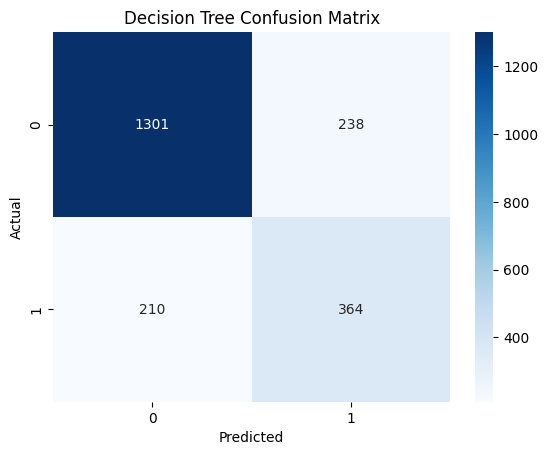

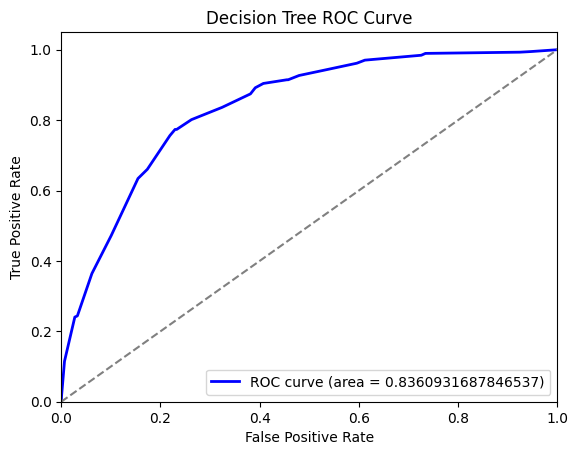

In [ ]:
# Import necessary libraries for Decision Tree
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, log_loss

X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn']

X_train_selected, X_test_selected, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# Scale the features but keep DataFrame format
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Convert back to DataFrame to retain column names
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

dt_model = DecisionTreeClassifier(random_state=42, criterion ='gini', max_depth=5, min_samples_leaf=1, min_samples_split=2)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
y_pred_proba = dt_model.predict_proba(X_test)[:, 1] if hasattr(dt_model, "predict_proba") else None

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"
cross_entropy = log_loss(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {auc}")
print(f"Cross Entropy (Log Loss): {cross_entropy}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.2f}")

# Print confusion matrix values
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")

# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Plot ROC Curve if probabilities are available
if y_pred_proba is not None:
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Decision Tree ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:41:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.80
Precision: 0.68
Recall: 0.53
F1 Score: 0.59
AUC: 0.86
Cross Entropy (Log Loss): 0.41
Specificity: 0.91
True Positives (TP): 304
False Positives (FP): 144
True Negatives (TN): 1395
False Negatives (FN): 270


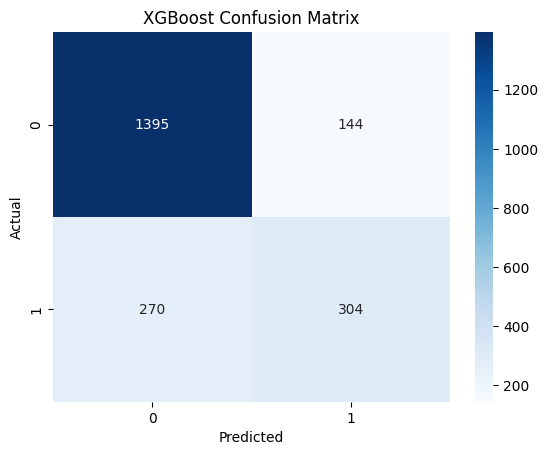

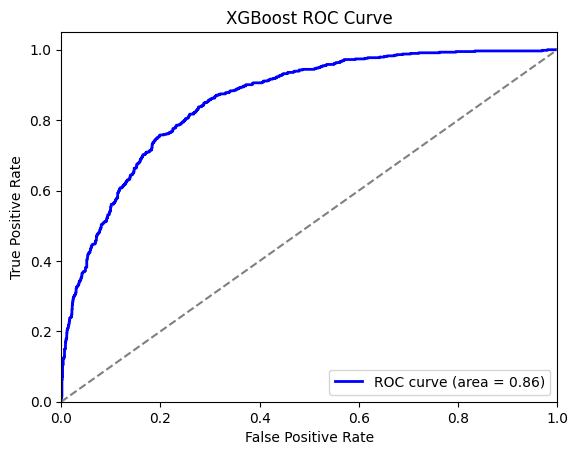

In [ ]:
# Import necessary libraries for XGBoost
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, log_loss
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn']

X_train_selected, X_test_selected, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# Scale the features but keep DataFrame format
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Convert back to DataFrame to retain column names
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)


xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, colsample_bytree= 1.0, learning_rate = 0.01, max_depth= 5, n_estimators = 500, subsample=0.7)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
cross_entropy = log_loss(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")
print(f"Cross Entropy (Log Loss): {cross_entropy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.2f}")

# Print confusion matrix values
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")

# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.81
Precision: 0.68
Recall: 0.56
F1 Score: 0.62
AUC: 0.86
Cross Entropy (Log Loss): 0.41
Specificity: 0.90
True Positives (TP): 324
False Positives (FP): 149
True Negatives (TN): 1390
False Negatives (FN): 250


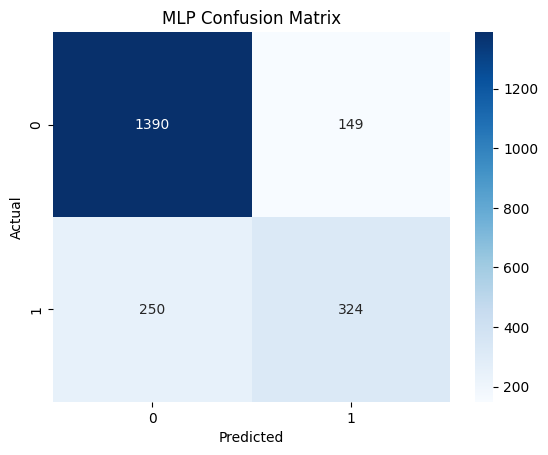

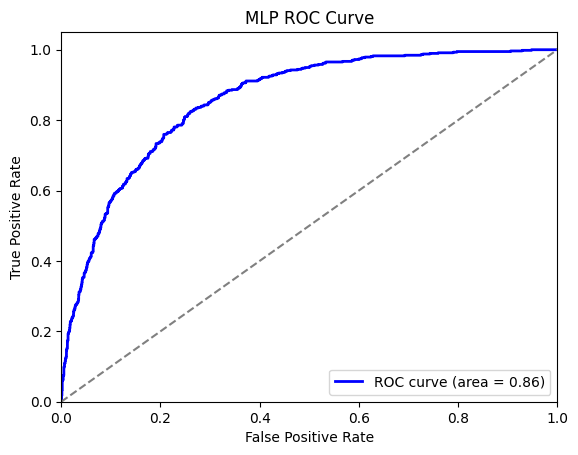

In [ ]:
# Import necessary libraries for MLP
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, log_loss
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn']

X_train_selected, X_test_selected, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# Scale the features but keep DataFrame format
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Convert back to DataFrame to retain column names
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)


from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Adjust as needed
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

mlp_model = MLPClassifier(hidden_layer_sizes=(200, 100, 50, 25),
                          activation='identity',
                          solver='adam',
                          max_iter=5000,
                          random_state=42,
                          alpha=0.0001
                          ) # 3 hidden layers and adam solver seems work best
mlp_model.fit(X_train, y_train)

y_pred = mlp_model.predict(X_test)
y_pred_proba = mlp_model.predict_proba(X_test)[:, 1]

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
cross_entropy = log_loss(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")
print(f"Cross Entropy (Log Loss): {cross_entropy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.2f}")

# Print confusion matrix values
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")

# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('MLP Confusion Matrix')
plt.show()

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(X_train_selected.head())  # Check first few rows
print(X_train_selected.isnull().sum())  # Ensure no missing values

     tenure  InternetService_Fiber optic  PaymentMethod_Electronic check  \
0  0.881078                    -0.882690                        1.399708   
1 -1.284263                     1.132901                        1.399708   
2 -0.793997                    -0.882690                       -0.714435   
3 -0.344587                     1.132901                        1.399708   
4 -1.079985                     1.132901                        1.399708   

   PaperlessBilling  OnlineSecurity  Contract_Month-to-month  
0          0.841222       -0.634162                -1.095853  
1          0.841222       -0.634162                 0.912532  
2         -1.188746       -0.634162                -1.095853  
3          0.841222       -0.634162                -1.095853  
4          0.841222        1.576884                 0.912532  
tenure                            0
InternetService_Fiber optic       0
PaymentMethod_Electronic check    0
PaperlessBilling                  0
OnlineSecurity       

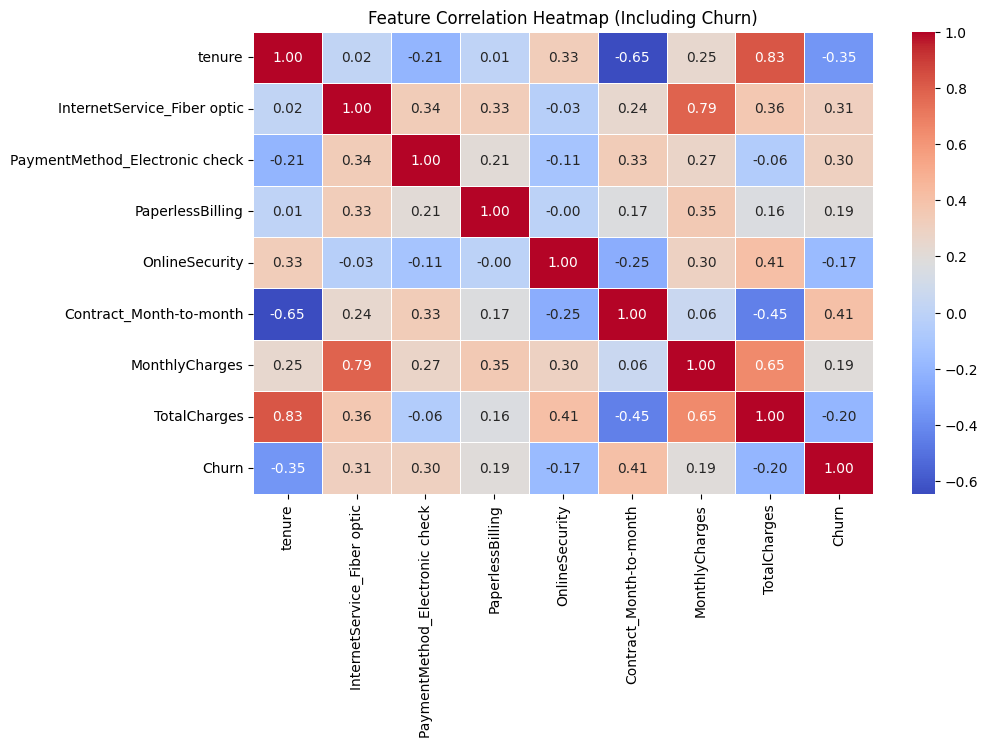

In [ ]:
correlation_matrix = df[['tenure', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check', 'PaperlessBilling', 'OnlineSecurity', 'Contract_Month-to-month', 'MonthlyCharges', 'TotalCharges', 'Churn']].corr()
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Including Churn)")
plt.show()